In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
import smote_variants as sv
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('creditcard.csv')

In [3]:
creditcard_df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
216754,140617.0,-0.636534,-0.384333,2.183800,1.208919,-0.498305,1.395712,-0.584046,0.659251,0.817017,...,0.425200,1.248602,0.210194,0.694343,-0.695161,-0.476805,0.271223,0.236635,113.23,0
197313,131950.0,-0.956043,1.070691,-1.638972,-0.467903,1.215555,-1.361441,1.212754,-0.070727,-0.651863,...,0.118016,0.240587,0.098335,0.616064,0.053551,0.500657,-0.532056,0.087523,35.82,0
228872,145699.0,0.206388,1.178108,-0.526611,-0.209510,0.782231,-1.295674,1.058346,-0.305335,-0.079584,...,0.255026,1.039094,-0.237520,-0.157774,-0.286195,-0.134042,0.394589,0.190300,1.00,0
2590,2119.0,1.266566,-0.401112,0.298575,-0.038423,-0.227704,0.730780,-0.655603,0.231351,1.069413,...,-0.028943,0.140049,-0.220563,-1.222458,0.448999,1.268209,-0.034186,-0.007870,17.43,0
165411,117416.0,-0.589037,0.632362,0.062287,-0.711485,0.752241,-0.258095,1.936828,-0.984261,-0.043872,...,0.184261,1.060488,-0.292650,0.701614,-0.424958,0.648888,-0.655215,-0.215841,136.36,0


In [4]:
creditcard_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
creditcard_df['Class'].nunique()

2

In [8]:
X = creditcard_df.drop(['Class'], axis=1)
X.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
28175,34888.0,-0.206127,-0.991541,1.768710,-2.270867,-1.427183,0.133309,-0.722516,0.200226,-1.270714,...,-0.270164,-0.186165,-0.222560,0.042761,-0.524848,-0.109655,-0.320701,0.065318,0.042420,79.00
155114,104520.0,-0.509093,0.871065,1.906943,-0.375512,0.490042,0.276139,0.527839,-0.225156,1.731705,...,0.030054,-0.371565,-0.668615,-0.431791,-1.121688,0.370444,-0.676458,-0.213749,-0.163719,10.47
190075,128679.0,-0.860435,1.180484,0.586552,-0.509536,0.449338,-0.304255,0.643671,0.441712,-0.270155,...,-0.237204,-0.245895,-0.868601,-0.313015,0.408211,0.694849,-0.342726,-0.109880,-0.007949,1.18
62499,50293.0,1.268362,0.683089,-0.568973,1.450624,0.406949,-0.814155,0.408145,-0.233469,-0.021538,...,-0.091253,-0.146814,-0.221665,-0.234416,-0.217183,0.918738,-0.229850,0.029187,0.041689,1.00
268467,163226.0,2.029174,-1.477060,0.132209,-0.873733,-1.814316,-0.101211,-1.634720,0.150930,0.769600,...,-0.499852,-0.182439,-0.004549,0.287592,-0.398008,-0.820329,1.273903,-0.028654,-0.038016,53.90
47894,43405.0,1.281471,0.247072,-0.285457,0.981922,0.409045,0.113044,0.149976,0.015229,-0.044140,...,-0.156143,-0.067124,-0.083875,-0.296331,-0.836676,0.947105,-0.203716,0.000677,-0.009682,2.00
89163,62459.0,-0.277256,0.352195,2.478334,2.997877,0.227380,0.786977,-0.288307,0.167995,-0.757484,...,0.381146,0.057795,0.398531,0.016898,0.020746,-0.594250,0.089629,-0.021480,-0.124945,18.20
207731,136811.0,-0.721131,0.431962,-1.728595,-0.514699,-1.956104,2.033789,5.193934,-2.119557,-0.818644,...,-0.582830,0.638466,0.383517,-0.124396,0.368050,-0.174478,0.363332,0.240322,-0.588022,852.30
97536,66262.0,1.435831,-0.712138,0.282029,-1.028497,-0.814227,0.035689,-0.994610,0.182503,-0.542773,...,0.011823,-0.003016,-0.211540,-0.055756,-0.891562,0.322121,-0.305500,0.006999,-0.000737,6.58
221068,142420.0,-2.769546,-0.060654,-0.055661,5.070726,1.176971,0.219563,-0.382565,0.696985,-1.757354,...,-1.302725,-0.145893,0.945409,1.464656,0.711953,0.049168,0.540455,0.211680,-0.328067,12.99


In [9]:
minmaxScaler = preprocessing.MinMaxScaler()

In [10]:
X = pd.DataFrame(minmaxScaler.fit_transform(X))
print(X.head(5))

         0         1         2         3         4         5         6   \
0  0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1  0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2  0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3  0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4  0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   

         7         8         9   ...        20        21        22        23  \
0  0.266815  0.786444  0.475312  ...  0.582942  0.561184  0.522992  0.663793   
1  0.264875  0.786298  0.453981  ...  0.579530  0.557840  0.480237  0.666938   
2  0.270177  0.788042  0.410603  ...  0.585855  0.565477  0.546030  0.678939   
3  0.266803  0.789434  0.414999  ...  0.578050  0.559734  0.510277  0.662607   
4  0.268968  0.782484  0.490950  ...  0.584615  0.561327  0.547271  0.663392   

         24        25        26        27        28        29  
0  0

In [11]:
y= creditcard_df['Class']

In [12]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [15]:
classifiers = [KNeighborsClassifier(5),
              RandomForestClassifier(random_state=20),
              LogisticRegression(random_state=20)]

In [16]:
for classifier in classifiers:
    estimator = Pipeline(steps = [
        ('classifier',classifier)
    ])
    estimator.fit(X_train, y_train)
    pred = estimator.predict(X_test)
    print(classifier)
    print('model score: %.2f' % estimator.score(X_test, y_test))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test,pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 1.00
[[56871     4]
 [   27    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.94      0.69      0.79        87

    accuracy                           1.00     56962
   macro avg       0.97      0.84      0.90     56962
weighted avg       1.00      1.00      1.00     56962

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
              

# Dimensionality Reduction

In [17]:
pca = PCA().fit(X_train)

Text(0, 0.5, 'Cumulative explained variance')

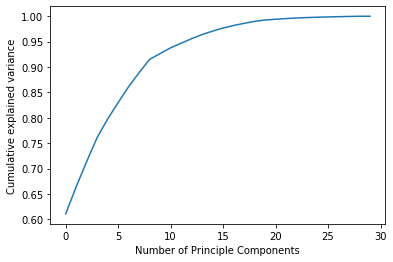

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principle Components')
plt.ylabel('Cumulative explained variance')

In [19]:
pca = PCA(n_components = 20)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Working with oversampling data

In [21]:
print('Before oversampling count of "yes": {}'.format(sum(y_train ==1)))
print('Before oversampling count of "no": {}'.format(sum(y_train == 0)))

Before oversampling count of "yes": 405
Before oversampling count of "no": 227440


In [22]:
oversamplerSMOTE = sv.SMOTE()

In [23]:
X_train_os, y_train_os = oversamplerSMOTE.sample(np.array(X_train_pca),np.array(y_train))

2021-01-04 19:40:12,664:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [24]:
print('After oversampling count of "yes": {}'.format(sum(y_train_os ==1)))
print('After oversampling count of "no": {}'.format(sum(y_train_os ==0)))

After oversampling count of "yes": 227440
After oversampling count of "no": 227440


In [25]:
print(X_train_os.shape)
print(y_train_os.shape)
print(X_test_pca.shape)
print(y_test.shape)

(454880, 20)
(454880,)
(56962, 20)
(56962,)


In [26]:
classifiers = [KNeighborsClassifier(5),
              RandomForestClassifier(random_state=20),
              LogisticRegression(random_state=20, max_iter = 500000)]

In [27]:
print(X_train_os)

[[ 0.41598068 -0.12443699  0.14390061 ... -0.00941078  0.00579299
   0.00433709]
 [ 0.33077433  0.01374708 -0.08581302 ...  0.00663653 -0.00465051
   0.00233846]
 [ 0.20406672  0.02645535 -0.01697143 ... -0.01479136 -0.01953511
  -0.00551527]
 ...
 [-0.22969522 -0.01888869  0.0109545  ...  0.10094029  0.00641608
  -0.04326639]
 [ 0.1606761   0.02116222 -0.04779911 ...  0.1199301   0.0018928
  -0.0046736 ]
 [ 0.00985409 -0.07186758  0.04130071 ...  0.13451039 -0.00230772
  -0.05866304]]


In [28]:
for classifier in classifiers:
    estimator = Pipeline(steps = [
        ('classifier',classifier)
    ])
    estimator.fit(X_train_os, y_train_os)
    pred2 = estimator.predict(X_test_pca)
    print(classifier)
    print('model score: %.2f' % estimator.score(X_test_pca, y_test))
    print(confusion_matrix(y_test, pred2))
    print(classification_report(y_test,pred2))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 1.00
[[56796    79]
 [   17    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.47      0.80      0.59        87

    accuracy                           1.00     56962
   macro avg       0.73      0.90      0.80     56962
weighted avg       1.00      1.00      1.00     56962

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
              